# Importing Libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from modwt import modwt,imodwt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
df = pd.read_csv("Tractor_Sales.csv",index_col = 0,parse_dates = [0],date_parser = parser)
df.size

144

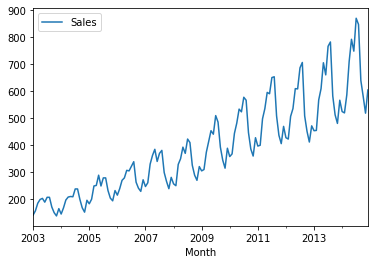

In [3]:
df.plot()

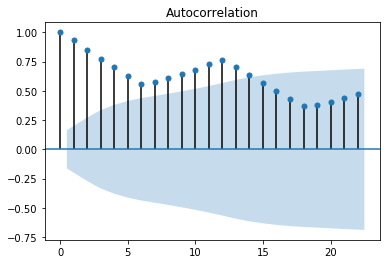

In [4]:
plot_acf(df)
plt.show()

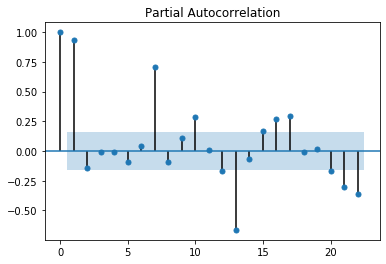

In [5]:
plot_pacf(df)
plt.show()

# To check Stationarity 

In [6]:
def Dickey_fuller(timeseries):
    print("-> Result of Dickey fuller Test :")
    print("======================================")
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','# Lags Used','No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]= value
    print(dfoutput)

Dickey_fuller(df.Sales)            

-> Result of Dickey fuller Test :
Test Statistics               1.108825
p-value                       0.995291
# Lags Used                  14.000000
No. of observations used    129.000000
Critical Value(1%)           -3.482088
Critical Value(5%)           -2.884219
Critical Value(10%)          -2.578864
dtype: float64


# Function to  check the best order which give the more accurate prediction

In [7]:
import itertools
import warnings
warnings.filterwarnings('ignore')

def order_p_d_q(train):
    order = 0
    para = 0
    p=d=q = range(0,14)
    pdq = list(itertools.product(p,d,q))
    for param in pdq:
        try:
            model_arima = ARIMA(train,param)
            model_arima_fit = model_arima.fit()
            aic = model_arima_fit.aic
            if(order == 0 or aic > -order and aic < order):
                order = aic
                para = param
        except:
            continue
    print(para,order)
    return(para)

# Wavelet Decomposition by using debauchi


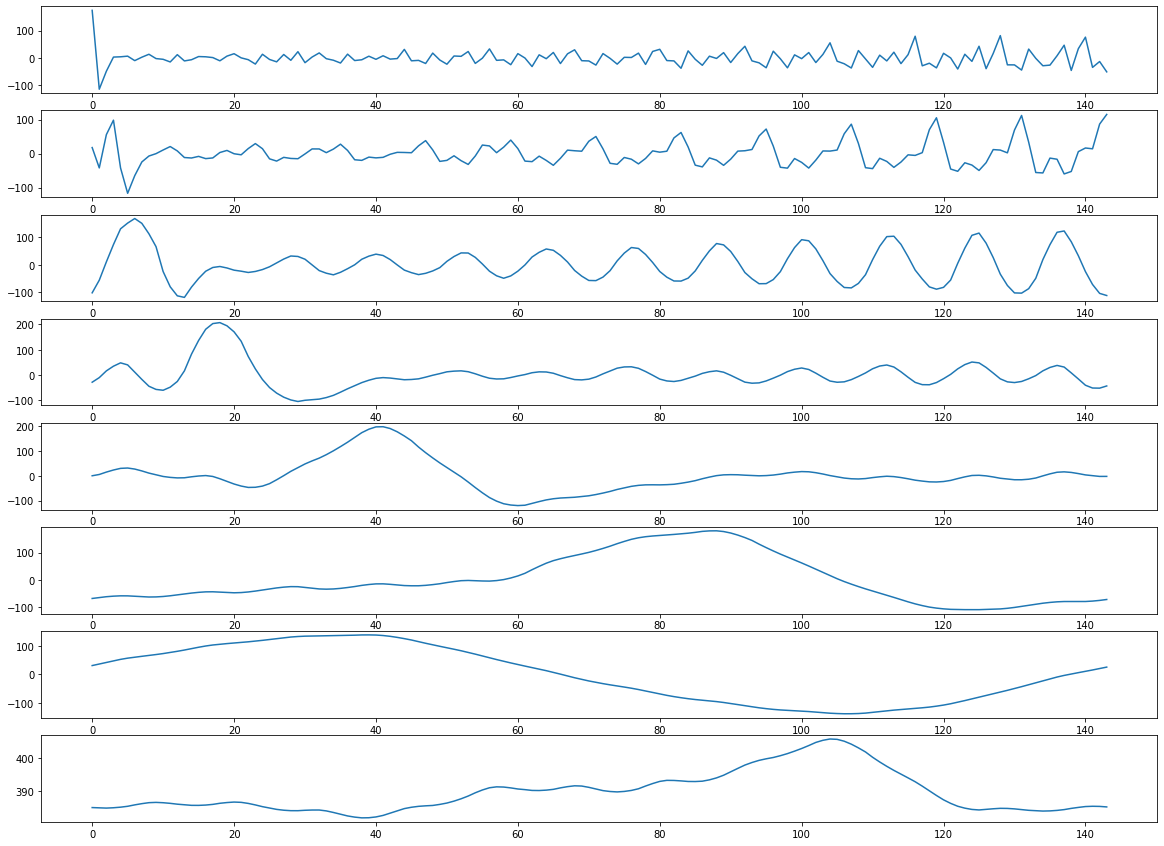

In [8]:
plt.rcParams['figure.figsize'] = (20,15)
level = 7
wavelets = modwt(df.Sales,'db2',level)
fig, ax = plt.subplots(len(wavelets))

for i, wavelet in enumerate(wavelets):
    ax[i].plot(wavelet)

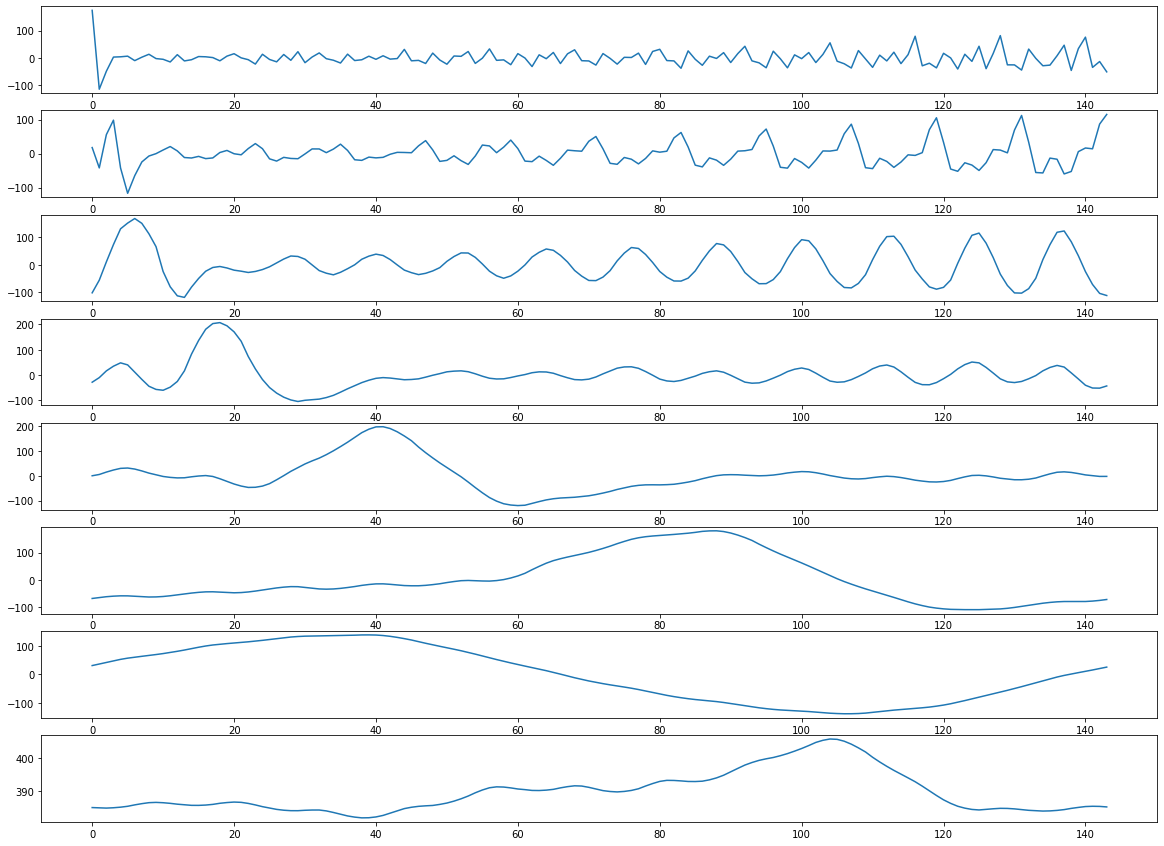

In [9]:
wave = modwt(df.Sales,'db2',level)
fig, ax = plt.subplots(len(wavelets))

for i, wavelet in enumerate(wavelets):
    ax[i].plot(wavelet)

In [10]:
plt.rcParams['figure.figsize'] = (10,6)
for i in range(level+1):
    print("Level-",i,"->",end = ' ')
    X = wavelets[i]
    train = X[:130]
    test = X[130:]
    set_order = order_p_d_q(train)
    model_arima = ARIMA(train,set_order)
    model_arima_fit = model_arima.fit()
    predictions = model_arima_fit.forecast(steps = 14)[0]
    wavelets[i][130:] = predictions

Level- 0 -> (6, 0, 1) 1134.3920312839064
Level- 1 -> (11, 0, 1) 929.6586856198846
Level- 2 -> (12, 0, 3) 732.4134290614295
Level- 3 -> (9, 2, 8) 609.4747764358624
Level- 4 -> (13, 2, 7) 400.1659187479177
Level- 5 -> (12, 2, 6) 219.08240535989466
Level- 6 -> (7, 2, 2) 0.942830554129614
Level- 7 -> (0, 2, 0) -68.99012119879893


# Inverse Adaptive-MODWT

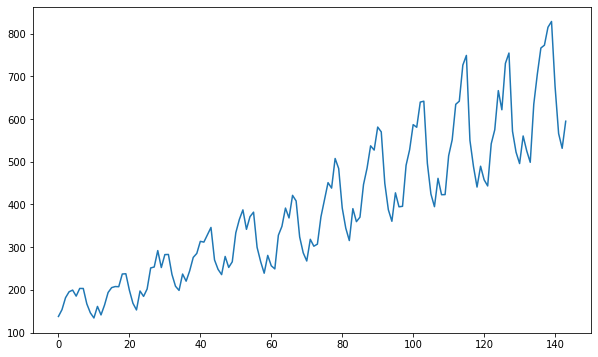

In [14]:
re_built = imodwt(wavelets,'db2')
plt.plot(re_built)

In [16]:
#set_order = order_p_d_q(train)

(10, 1, 0) 1210.5644923150273


In [112]:
for i in range(level+1):
    X = wave[i]
    train = X[:130]
    test = X[130:]
    model_arima = ARIMA(train,order = (6,1,1))
    model_arima_fit = model_arima.fit()
    predictions = model_arima_fit.forecast(steps = 14)[0]
    wave[i][130:] = predictions

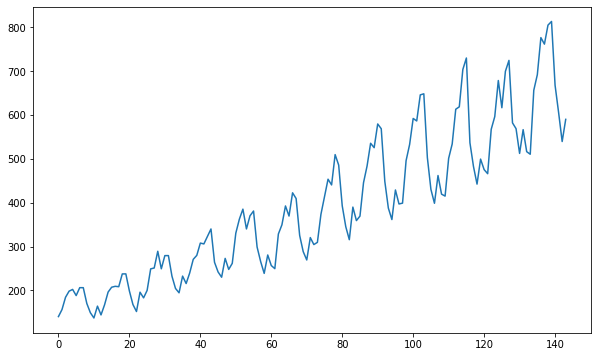

In [116]:
plt.rcParams['figure.figsize'] = (10,6)
re_built1 = imodwt(wave, 'db2')
plt.plot(re_built1)

In [117]:
X = df.values
train = X[:130]
test = X[130:]
predictions = []

In [119]:
model_arima = ARIMA(train,order = (6,1,1))
model_arima_fit = model_arima.fit()
predictions = model_arima_fit.forecast(steps = 14)[0]

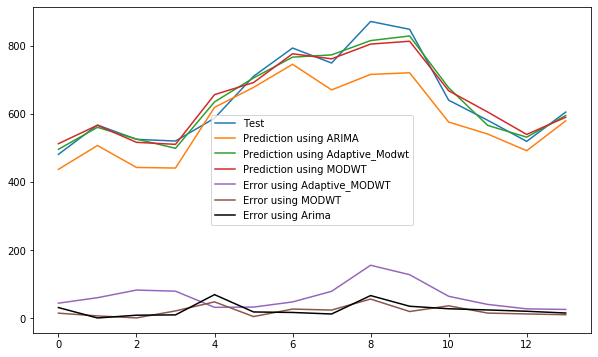

In [120]:
array1 = predictions
array2 = re_built[130:]
array3 = re_built1[130:]

error1 = []
error2 = []
error3 = []
            
for i in range(len(array1)):
    error1.append(abs(test[i]-array1[i]))
for i in range(len(array1)):
    error2.append(abs(test[i]-array2[i]))
for i in range(len(array1)):
    error3.append(abs(test[i]-array3[i]))

plt.plot(test,label = 'Test')

plt.plot(predictions,label = 'Prediction using ARIMA')
plt.plot(re_built[130:],label = 'Prediction using Adaptive_Modwt')
plt.plot(re_built1[130:],label = 'Prediction using MODWT')

plt.plot(error1,label = 'Error using Adaptive_MODWT')
plt.plot(error2,label = 'Error using MODWT')
plt.plot(error3,color='black',label = 'Error using Arima')

plt.legend()

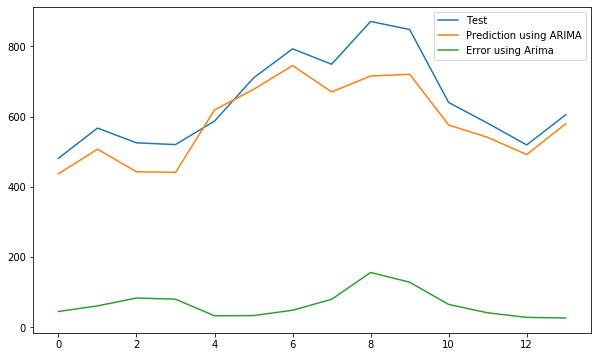

In [121]:
plt.plot(test,label = 'Test')
plt.plot(predictions,label = 'Prediction using ARIMA')
plt.plot(error1,label = 'Error using Arima')
plt.legend()

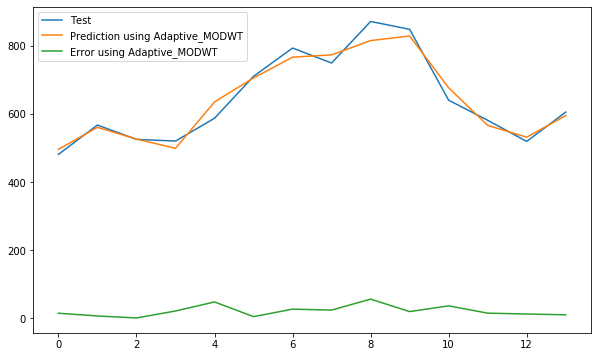

In [122]:
plt.plot(test,label = 'Test')
plt.plot(re_built[130:],label = 'Prediction using Adaptive_MODWT')
plt.plot(error2,label = 'Error using Adaptive_MODWT')
plt.legend()

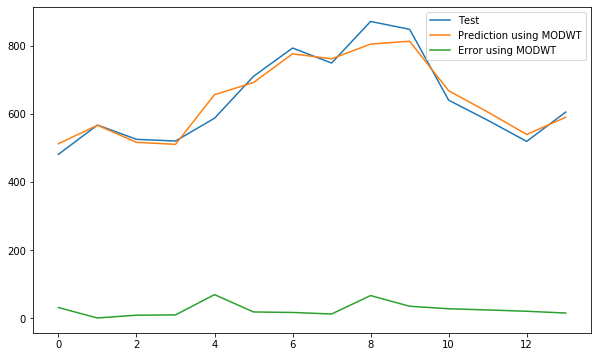

In [123]:
plt.plot(test,label = 'Test')
plt.plot(re_built1[130:],label = 'Prediction using MODWT')
plt.plot(error3,label = 'Error using MODWT')
plt.legend()

In [124]:
dat = pd.DataFrame(test)
dat.insert(1,'ARIMA',predictions)
dat.insert(2,'MODWT',re_built1[130:])
dat.insert(3,'Adaptive_MODWT',re_built[130:])
dat = dat.rename(columns = {0:"Original",1:"Arima",2:"MODWT",3:"Adaptive_MODWT"})
dat

,Original,ARIMA,MODWT,Adaptive_MODWT
0,481,436.882726,512.231037,495.740849
1,567,506.870599,566.365452,560.307831
2,525,442.462502,516.194787,525.825251
3,520,440.716952,510.308331,498.657358
4,587,618.850891,656.180827,634.872718
5,710,677.417183,691.705673,705.238005
6,793,745.284849,776.166305,766.250548
7,749,670.114570,761.287968,772.882652
8,871,715.585033,804.605019,814.862266
9,848,720.358816,812.962870,828.405659


In [125]:
from sklearn.metrics import mean_squared_error

MSE_ARIMA = mean_squared_error(dat.Original,dat.ARIMA)
MSE_Adaptive_MODWT = mean_squared_error(dat.Original,dat.Adaptive_MODWT)
MSE_MODWT = mean_squared_error(dat.Original,dat.MODWT)

print("Mean Squared error using ARIMA          :",MSE_ARIMA)
print("Mean Squared error using MODWT          :",MSE_MODWT)
print("Mean Squared error using Adaptive_MODWT :",MSE_Adaptive_MODWT)

Mean Squared error using ARIMA          : 5489.71177482386
Mean Squared error using MODWT          : 1023.9066738610492
Mean Squared error using Adaptive_MODWT : 689.7721231687053
